train loss:2.299471978148745
=== epoch:1, train acc:0.165, test acc:0.175 ===
train loss:2.2966417533021817
train loss:2.2921468003710954
train loss:2.2909465123231016
train loss:2.277617743436498
train loss:2.2741003349296602
train loss:2.266938518138082
train loss:2.2387949328955874
train loss:2.2381761989117623
train loss:2.2130669718904166
train loss:2.1621487860605497
train loss:2.15292274362697
train loss:2.1022048112349867
train loss:2.052592777210455
train loss:1.9869860621203745
train loss:1.960454519647226
train loss:1.8950277833924987
train loss:1.803500759096284
train loss:1.7339741210098407
train loss:1.7345438747581352
train loss:1.5806934504402002
train loss:1.5830667819048774
train loss:1.48086764672963
train loss:1.40665748714456
train loss:1.305718009654911
train loss:1.2791883138435272
train loss:1.1203244333018088
train loss:1.0950246073462322
train loss:1.0368544838407052
train loss:0.8755425129800546
train loss:0.8419604231547865
train loss:1.0152360197981307
trai

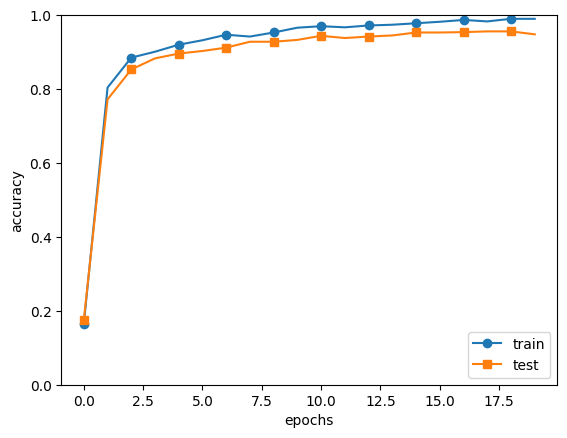

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gzip
from collections import OrderedDict
from common.trainer import Trainer
from simple_convnet import SimpleConvNet
from common.layers import *
from common.gradient import numerical_gradient

# 로그 파일 설정
log_file = 'accuracy_log2.txt'

if os.path.exists(log_file):
    os.remove(log_file)

with open(log_file, 'w') as f:
    f.write("MNIST 데이터셋을 로드합니다...\n")

def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터셋을 로드합니다."""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 1, 28, 28)

    with open(log_file, 'a') as f:
        f.write(f"{kind} 데이터를 로드했습니다.\n")

    return images, labels

# 데이터 읽기 (패션 MNIST)
path = './dataset'  # 실제 데이터 파일들이 저장된 경로

x_train, t_train = load_mnist(path, kind='train')
x_test, t_test = load_mnist(path, kind='t10k')

# 데이터 전처리
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
t_train = np.eye(10)[t_train]  # 원-핫 인코딩
t_test = np.eye(10)[t_test]    # 원-핫 인코딩

# 학습 데이터 크기 줄이기 (코드 실행 속도를 빠르게 하기 위해)
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# trainer.train() 안에서 에포크 단위로 train_acc_list와 test_acc_list를 생성했을 것입니다.
# 이를 사용하여 로그 파일에 기록할 내용을 생성합니다.
train_acc = trainer.train_acc_list[-1]  # 마지막 에포크의 train accuracy
test_acc = trainer.test_acc_list[-1]    # 마지막 에포크의 test accuracy
content = "Epoch {}: Train accuracy: {:.4f}, Test accuracy: {:.4f}".format(max_epochs, train_acc, test_acc)

# 새로운 로그 파일 생성 후 내용 추가
with open(log_file, 'a') as f:
    f.write(content + '\n')

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
